# Lecture 6.2: Cellular Atomata

In [49]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt

## 1D Contact Process

**5. Build the cellular automata model in python.**

For the boundary conditions, we will need to use the Modulus operator: $x\%n$ gives us the remainder of $\frac{x}{n}$.

In [9]:
np.array([c%10 for c in range(-2,11)])

array([8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0])

Now we can write the code

In [29]:
def OneDContact(beta,gamma,tMax,nCell):
    tau=beta/nCell
    #Initialize
    lat=np.zeros(nCell)
    lat[np.random.randint(0, nCell)]=1 #initial infection
    print('Inital Array')
    print(lat)
    for t in range(tMax):
        latTemp=lat; #create a temporary lattice that can be updated
        for c in range(nCell):
            if lat[c]==0: #focal cell is susceptible
                n=lat[(c-1)%nCell]+lat[(c+1)%nCell]
                if rand.random()<tau*n: # this only works if \tau is small enough, otherwise we have to multiply by a Deltat 
                    print('infection')
                    latTemp[c]=1 #Note that we update the temporary lattice
            else: #focal cell is infected
                if rand.random()<gamma:
                    print('recovery')
                    latTemp[c]=0
        lat=latTemp
        print(lat)
    return lat

In [30]:
OneDContact(3,0.5,5,10)

Inital Array
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
infection
infection
[1. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
recovery
[0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
infection
infection
recovery
[1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
recovery
recovery
recovery
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

**6.  How does the number of infected individuals change over time? How fast does the disease spread in space?**

In [52]:
def OneDContact2(beta,gamma,tMax,nCell):
    tau=beta/nCell
    #Initialize
    lat=np.zeros(nCell,dtype=int)
    lat[np.random.randint(0, nCell)]=1 #initial infectio
    for t in range(tMax):
        latTemp=lat; #create a temporary lattice that can be updated
        for c in range(nCell):
            if lat[c]==0: #focal cell is susceptible
                n=lat[(c-1)%nCell]+lat[(c+1)%nCell]
                if rand.random()<tau*n: # this only works if \tau is small enough, otherwise we have to multiply by a Deltat 
                    latTemp[c]=1 #Note that we update the temporary lattice
            else: #focal cell is infected
                if rand.random()<gamma:
                    latTemp[c]=0
        lat=latTemp
    return lat

In [76]:
# Create a dictionary to store results
CA_dict = {}

# Calculate and save results for specified indices
for index in range(100):
    CA_dict[index] = OneDContact2(7,0.1,30,50) #beta=3, gamma=0.1, #tMax=10, #nCell=50

In [77]:
finalSize=np.array([np.sum(CA_dict[index]) for index in range(100)])

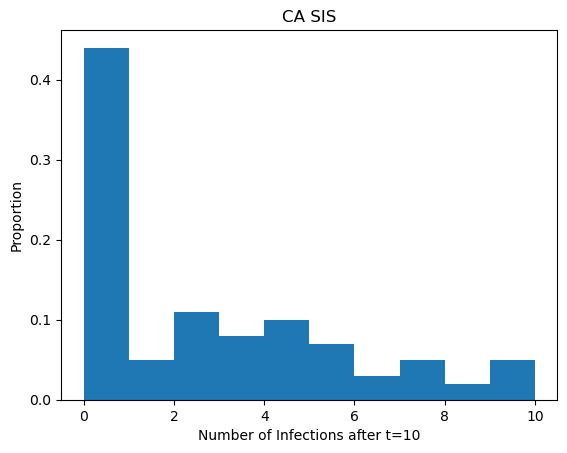

In [78]:
plt.hist(finalSize, density=True)
# Add labels and title
plt.xlabel('Number of Infections after t=10')
plt.ylabel('Proportion')
plt.title('CA SIS')
plt.show()

In [79]:
mtrx=CA_dict[0]
for index in range(1,100):
    mtrx=np.vstack([mtrx,CA_dict[index]])

In [80]:
mtrx

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

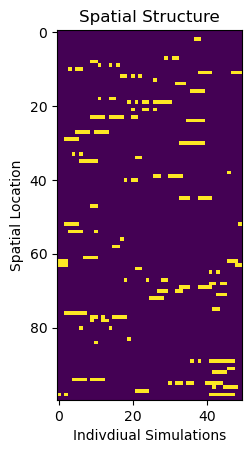

In [81]:
plt.imshow(mtrx, cmap='viridis', interpolation='nearest')
plt.xlabel('Indivdiual Simulations')
plt.ylabel('Spatial Location')
plt.title('Spatial Structure')
plt.show()

**7. How does this compare to a non-spatial stochastic model?**

We need to build a discrete-time SIS model to compare to.

In [95]:
def SIDiscrete(beta,gamma,tMax,kappa):
    tau=beta/kappa
    #Initialize
    dyn=np.array([1])
    for t in range(tMax):
        S=kappa-np.sum(dyn[-1])
        I=np.sum(dyn[-1])
        nInf=np.random.binomial(n=S, p=tau*S*I) #number of new infections
        nRec=np.random.binomial(n=I, p=gamma*I) #number of new infections
        dyn=np.hstack([dyn,I+nInf-nRec])
    return dyn

The disease spreads much much faster in the unstructured population model.  As a result we have to reduce beta by several order of magnitude.

In [105]:
SIDiscrete(0.01,0.1,30,50)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 3, 4, 5, 6, 7, 3, 5, 2, 3,
       4, 4, 2, 4, 8, 3, 3, 4, 6])